In [200]:
#%pip install pandas
#%pip install seaborn
#%pip install numpy
#%pip install -U scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [201]:
def load_data(filename):
    # Load the data
    df = pd.read_csv(filename, sep=' ', header=None)
    return df

In [202]:
data = [
    "data/out/a3.data.gz",
    "data/out/aggregation.data.gz",
    "data/out/compound.data.gz",
    "data/out/d31.data.gz",
    "data/out/flame.data.gz",
    "data/out/pathbased.data.gz",
    "data/out/s4.data.gz",
    "data/out/unbalance.data.gz",
]

In [203]:
df = load_data(data[1])

In [204]:
df.head()

,0,1
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


In [215]:
def svm(df, outliers_fraction):
    model = OneClassSVM(kernel='rbf', gamma=0.1, nu=outliers_fraction).fit(df)
    cp = df.copy()
    cp['pred'] = model.predict(df)
    #sns.scatterplot(data=cp, x=0, y=1, hue='pred', palette="deep")
    return cp

def isolation_forest(df, outliers_fraction):
    model = IsolationForest(contamination=outliers_fraction, random_state=42).fit(df)
    cp = df.copy()
    cp['pred'] = model.predict(df)
    #sns.scatterplot(data=cp, x=0, y=1, hue='pred', palette="deep")
    return cp

def local_outlier_factor(df, outliers_fraction, n_neighbors):
    model = LocalOutlierFactor(contamination=outliers_fraction, n_neighbors=n_neighbors).fit(df)
    cp = df.copy()
    cp['pred'] = model.fit_predict(df)
    #sns.scatterplot(data=cp, x=0, y=1, hue='pred', palette="deep")
    return cp

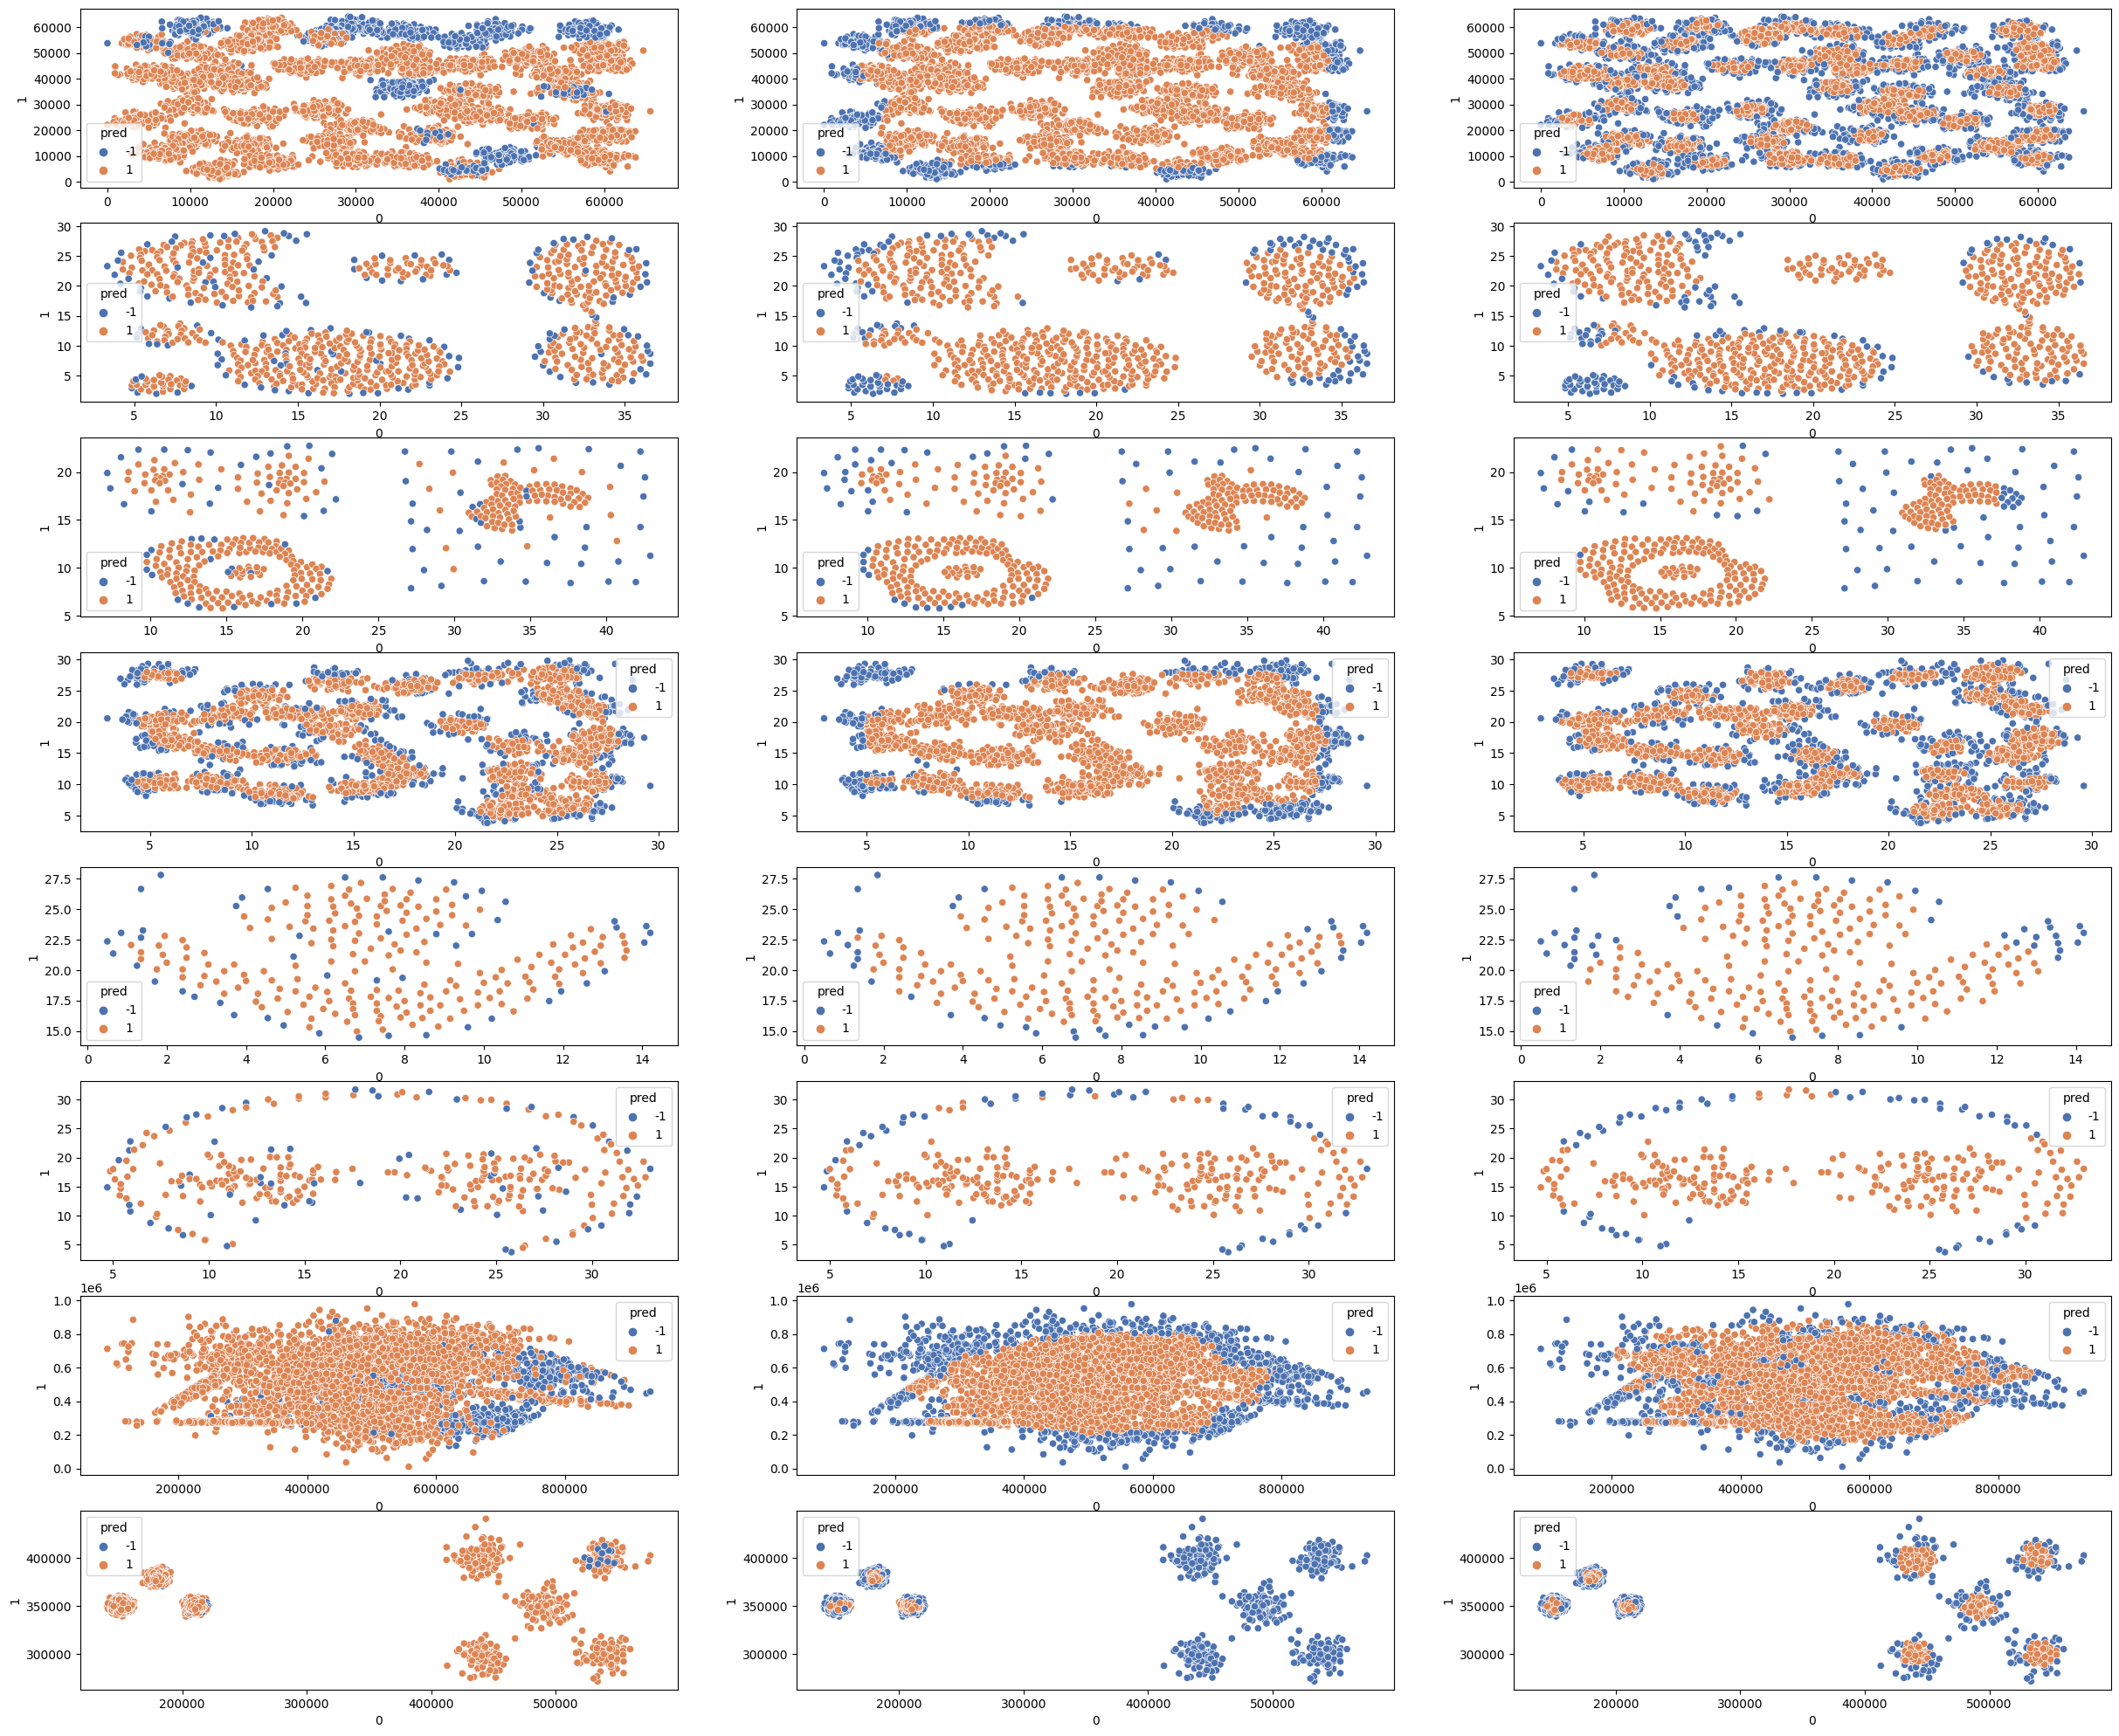

In [224]:
fig, axes = plt.subplots(len(data), 3, figsize=(30,25))

for i, file in enumerate(data):
    #print(i)
    #print(file)
    df = load_data(file)
    cp = svm(df, 0.2)
    sns.scatterplot(ax=axes[i,0], data=cp, x=0, y=1, hue='pred', palette="deep")
    cp = isolation_forest(df, 0.2)
    sns.scatterplot(ax=axes[i,1], data=cp, x=0, y=1, hue='pred', palette="deep")
    cp = local_outlier_factor(df, 0.2, 40)
    sns.scatterplot(ax=axes[i,2], data=cp, x=0, y=1, hue='pred', palette="deep")



One Class SVM - sometimes clusters as an outliers

Isolation Forest - spearation of a cluster of data

Local Outlier Factor